# HW 3: Optimization

Implementation of the exercises of https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html

1. Gradient Descent Algorithm Implementation

In [1]:
import numpy as np

def gradient_descent(f, grad_f, x0, alpha, maxit, tolf, tolx):
    """
    Implements the Gradient Descent (GD) algorithm.
    
    f: function. The function to optimize.
    grad_f: function. The gradient of f(x).
    x0: ndarray. The initial guess.
    alpha: float. Fixed step size.
    maxit: int. Maximum number of iterations.
    tolf: float. Convergence tolerance based on gradient norm.
    tolx: float. Convergence tolerance based on parameter update.
    
    Returns:
    x: List of all iterates.
    k: Number of iterations performed.
    f_val: List of function values at each iterate.
    grad_norm: List of gradient norms at each iterate.
    """
    x = [x0]
    f_val = [f(x0)]
    grad_norm = [np.linalg.norm(grad_f(x0))]
    k = 0

    while k < maxit:
        grad = grad_f(x[-1])
        x_new = x[-1] - alpha * grad

        # Append new values
        x.append(x_new)
        f_val.append(f(x_new))
        grad_norm.append(np.linalg.norm(grad))
        k += 1

        # Check stopping criteria
        if grad_norm[-1] < tolf * grad_norm[0]:
            break
        if np.linalg.norm(x_new - x[-2]) < tolx:
            break

    return x, k, f_val, grad_norm


2. Backtracking Gradient Descent Algorithm

In [2]:
def gradient_descent_backtracking(f, grad_f, x0, maxit, tolf, tolx):
    """
    Implements the Gradient Descent (GD) algorithm with Backtracking.
    
    f: function. The function to optimize.
    grad_f: function. The gradient of f(x).
    x0: ndarray. The initial guess.
    maxit: int. Maximum number of iterations.
    tolf: float. Convergence tolerance based on gradient norm.
    tolx: float. Convergence tolerance based on parameter update.
    
    Returns:
    x: List of all iterates.
    k: Number of iterations performed.
    f_val: List of function values at each iterate.
    grad_norm: List of gradient norms at each iterate.
    """
    def backtracking(f, grad_f, x, alpha=1, c=0.8, tau=0.5):
        while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
            alpha *= tau
        return alpha

    x = [x0]
    f_val = [f(x0)]
    grad_norm = [np.linalg.norm(grad_f(x0))]
    k = 0

    while k < maxit:
        grad = grad_f(x[-1])
        alpha = backtracking(f, grad_f, x[-1])
        x_new = x[-1] - alpha * grad

        # Append new values
        x.append(x_new)
        f_val.append(f(x_new))
        grad_norm.append(np.linalg.norm(grad))
        k += 1

        # Check stopping criteria
        if grad_norm[-1] < tolf * grad_norm[0]:
            break
        if np.linalg.norm(x_new - x[-2]) < tolx:
            break

    return x, k, f_val, grad_norm

3. Testing on the Rosenbrock Function

In [3]:
def rosenbrock(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

def grad_rosenbrock(x):
    grad_x0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0] ** 2)
    grad_x1 = 200 * (x[1] - x[0] ** 2)
    return np.array([grad_x0, grad_x1])

# Parameters
x0 = np.array([-1.2, 1.0])  # Initial guess
alpha = 0.001  # Step size for fixed step GD
maxit = 10000
tolf = 1e-6
tolx = 1e-6

# Run Gradient Descent with fixed step size
x_gd, k_gd, f_val_gd, grad_norm_gd = gradient_descent(rosenbrock, grad_rosenbrock, x0, alpha, maxit, tolf, tolx)

# Run Gradient Descent with backtracking
x_bk, k_bk, f_val_bk, grad_norm_bk = gradient_descent_backtracking(rosenbrock, grad_rosenbrock, x0, maxit, tolf, tolx)

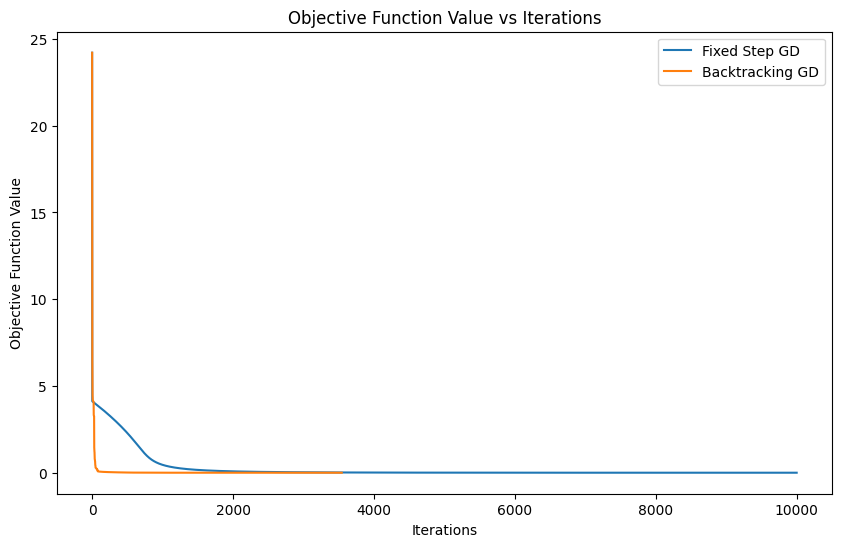

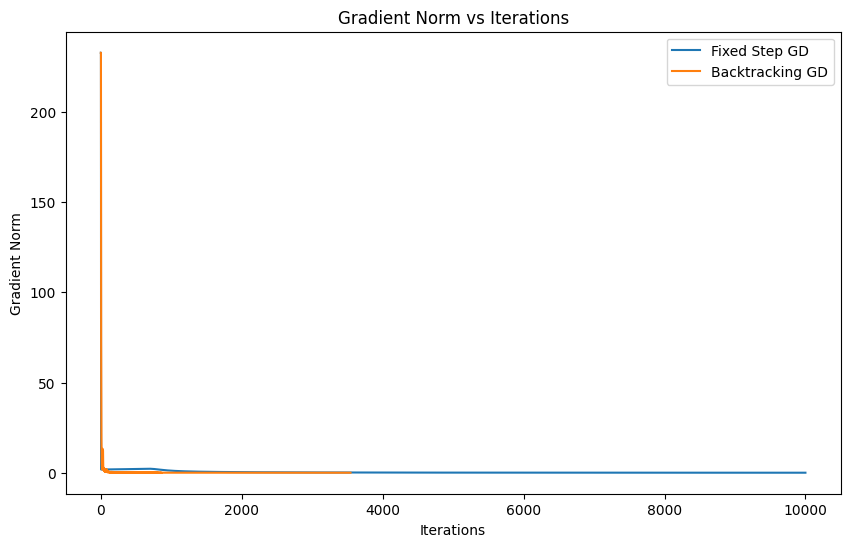

In [4]:
import matplotlib.pyplot as plt

# Plot objective function values
plt.figure(figsize=(10, 6))
plt.plot(range(len(f_val_gd)), f_val_gd, label="Fixed Step GD")
plt.plot(range(len(f_val_bk)), f_val_bk, label="Backtracking GD")
plt.xlabel("Iterations")
plt.ylabel("Objective Function Value")
plt.legend()
plt.title("Objective Function Value vs Iterations")
plt.show()

# Plot gradient norms
plt.figure(figsize=(10, 6))
plt.plot(range(len(grad_norm_gd)), grad_norm_gd, label="Fixed Step GD")
plt.plot(range(len(grad_norm_bk)), grad_norm_bk, label="Backtracking GD")
plt.xlabel("Iterations")
plt.ylabel("Gradient Norm")
plt.legend()
plt.title("Gradient Norm vs Iterations")
plt.show()

## Optimization via Gradient Descent
In this Homework, we will consider a general optimization problem:

$$
x^* = \arg\min_{x \in \mathbb{R}^n}f(x).
$$

where, $f: \mathbb{R}^n \to \mathbb{R}$ is a differentiable function for which we know how to compute $\nabla f(x)$.
This is done by the Gradient Descent (GD) method: an iterative algorithm that, given an initial iterate $x_0 \in \mathbb{R}^n$ and a positive parameter $\alpha_k > $ called *step size*, computes:

$$
x_{k+1} = x_k − \alpha_k \nabla f (x_k).
$$

You are asked to implement the GD method in Python and to test it with some exemplar functions. In particular:

*  Write a script that implement the GD algorithm with fixed step size (i.e. no backtracking), with the input-output structure discussed in the first Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).
* Write a script that implement the GD algorithm with backtracking, with the input-output structure discussed in the second Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).
* Test the algorithm above on the following functions:
    1. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2, 
       $$

       for which the true solution is $x^* = (3, 1)^T$.

    2. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2, 
       $$

       for which the true solution is $x^* = (1, 2)^T$.
    3. $f: \mathbb{R}^n \to \mathbb{R}$ such that:

       $$
       f(x) = \frac{1}{2}|| Ax - b ||_2^2, 
       $$

       where $A \in \mathbb{R}^{n x n}$ is the Vandermonde matrix associated with the vector $v \in \mathbb{R}^n$ that contains $n$ equispaced values in the interval $[0,1]$, and $b \in \mathbb{R}^n$ is computed by first setting $x^* = (1, 1, \dots ,1)^T$, and then $b = A x^*$. Try for different values of $n$ (e.g. $n = 5,10,15, \dots$).
    4. $f: \mathbb{R}^n \to \mathbb{R}$ such that:

       $$
       f(x) = \frac{1}{2} || Ax - b ||_2^2 + \frac{\lambda}{2} ||x||_2^2, 
       $$

       where $A \in \mathbb{R}^{n times n}$ and $b \in \mathbb{R}^n$ are the same of the exercise above, while $\lambda$ is a fixed value in the interval $[0, 1]$. Try different values of $\lambda$ and comment the result.
    5. $f: \mathbb{R} \to \mathbb{R}$ such that:

       $$
       f(x) = x^4 + x^3 - 2x^2 - 2x.
       $$

* For each of the functions above, test the GD method with and without backtracking, trying different values for the step size $\alpha > 0$ when backtracking is not employed. Comment on the results.
* Plot the value of $||\nabla f(x_k)||_2$ as a function of $k$, check that it goes to zero, and compare the convergence speed (in terms of the number of iterations $k$) for the different values of $\alpha > 0$ and with backtracking.
* For each of the points above, use:
  - `x0` = $(0, 0, \dots, 0)^T$ (except for function 5, which is discussed in the following point),
  - `kmax` = 100,
  - `tolf` = `tolx` = `1e-5`. 
  Also, when the true solution $x^*$ is given, plot the error $||x_k−x^*||_2$ as a function of $k$.
* Plot the graph of the non-convex function 5 in the interval $[−3,3]$, and test the convergence of GD with different values of `x0` (of your choice) and different step-sizes. When is the convergence point the global minimum?
* *Hard (optional):* For functions 1 and 2, show the contour plot around the true minimum and visualize the path described by the iterations, i.e. representing on the contour plot the position of each iterate computed by the GD algorithm. See the `plt.contour` documentation.

In [44]:
def gradient_descent(f, grad_f, x0, alpha=0.01, kmax=100, tolx=1e-5, tolf=1e-5, backtracking=False):
    xk = np.array(x0, dtype=float)
    path = [xk.copy()]
    fk = f(xk)
    grad_fk = grad_f(xk)

    for k in range(kmax):
        if np.linalg.norm(grad_fk, 2) < tolf:
            break

        if backtracking:
            # Backtracking line search
            t = alpha
            beta = 0.8
            c = 1e-4
            while f(xk - t * grad_fk) > fk - c * t * np.dot(grad_fk, grad_fk):
                t *= beta
            step_size = t
        else:
            step_size = alpha

        # Update step
        xk_new = xk - step_size * grad_fk

        # Stopping criteria
        if np.linalg.norm(xk_new - xk, 2) < tolx:
            xk = xk_new
            break

        # Update for next iteration
        xk = xk_new
        fk = f(xk)
        grad_fk = grad_f(xk)
        path.append(xk.copy())

    return xk, np.array(path)

In [23]:
def f1(x):
    x = np.array(x)
    return (x[0] - 3) ** 2 + (x[1] - 1) ** 2

def grad_f1(x):
    return np.array([2 * (x[0] - 3), 2 * (x[1] - 1)])
def f2(x):
    x = np.array(x)
    return 10 * (x[0] - 1) ** 2 + (x[1] - 2) ** 2
def grad_f2(x):
    return np.array([20 * (x[0] - 1), 2 * (x[1] - 2)])

In [24]:
# Test Gradient Descent on Function 1
x0 = [0, 0]
kmax = 100
tolx = 1e-5
tolf = 1e-5
functions = [(f1, grad_f1, "Function 1"), (f2, grad_f2, "Function 2")]


In [30]:
selected_path = (0.1, None)

Experiments for Function 1
Fixed step size α=0.1: Solution x*=[2.99996575 0.99998858], Iterations=50
Fixed step size α=0.2: Solution x*=[2.99998578 0.99999526], Iterations=23
Fixed step size α=0.30000000000000004: Solution x*=[2.99999678 0.99999893], Iterations=14
Fixed step size α=0.4: Solution x*=[2.99999846 0.99999949], Iterations=8
Fixed step size α=0.5: Solution x*=[3. 1.], Iterations=1
Fixed step size α=0.6: Solution x*=[3.00000154 1.00000051], Iterations=8
Fixed step size α=0.7000000000000001: Solution x*=[3.00000322 1.00000107], Iterations=15
Fixed step size α=0.8: Solution x*=[3.00000307 1.00000102], Iterations=26
Fixed step size α=0.9: Solution x*=[2.9999954  0.99999847], Iterations=60
Fixed step size α=1.0: Solution x*=[0. 0.], Iterations=100


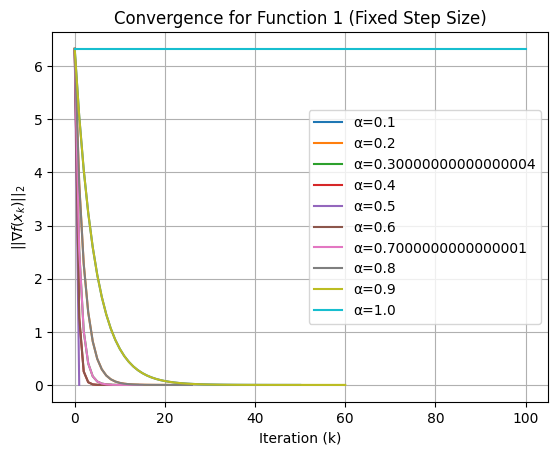

Backtracking: Solution x*=[2.99996575 0.99998858], Iterations=50


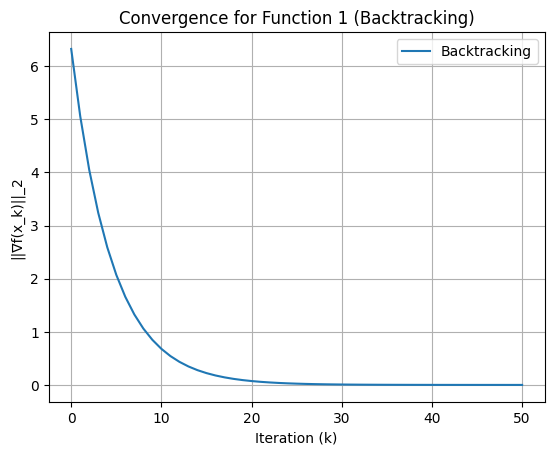

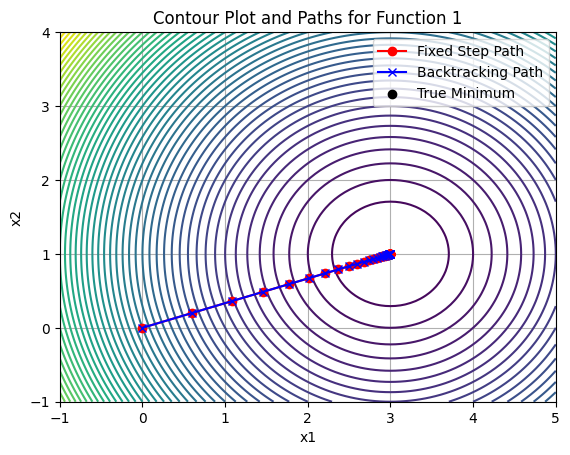

Experiments for Function 2
Fixed step size α=0.1: Solution x*=[0. 2.], Iterations=100
Fixed step size α=0.2: Solution x*=[-5.15377521e+47  2.00000000e+00], Iterations=100
Fixed step size α=0.30000000000000004: Solution x*=[-7.88860905e+69  2.00000000e+00], Iterations=100
Fixed step size α=0.4: Solution x*=[-3.23447651e+84  2.00000000e+00], Iterations=100
Fixed step size α=0.5: Solution x*=[-2.65613989e+95  2.00000000e+00], Iterations=100
Fixed step size α=0.6: Solution x*=[-1.37806123e+104  2.00000000e+000], Iterations=100
Fixed step size α=0.7000000000000001: Solution x*=[-2.47933511e+111  2.00000000e+000], Iterations=100
Fixed step size α=0.8: Solution x*=[-4.06561178e+117  2.00000000e+000], Iterations=100
Fixed step size α=0.9: Solution x*=[-1.10889937e+123  2.00000000e+000], Iterations=100
Fixed step size α=1.0: Solution x*=[-7.50516242e+127  0.00000000e+000], Iterations=100


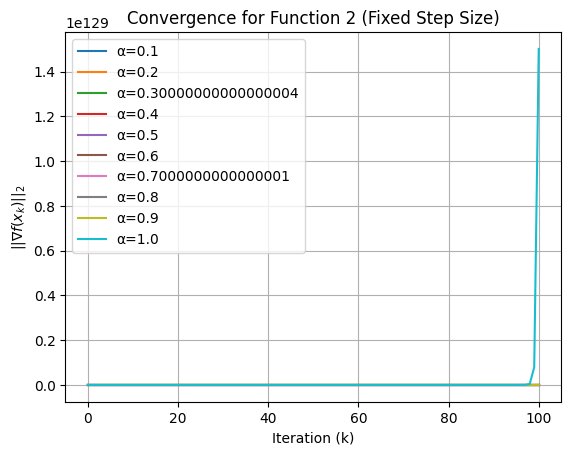

Backtracking: Solution x*=[1.00000474 1.99999946], Iterations=72


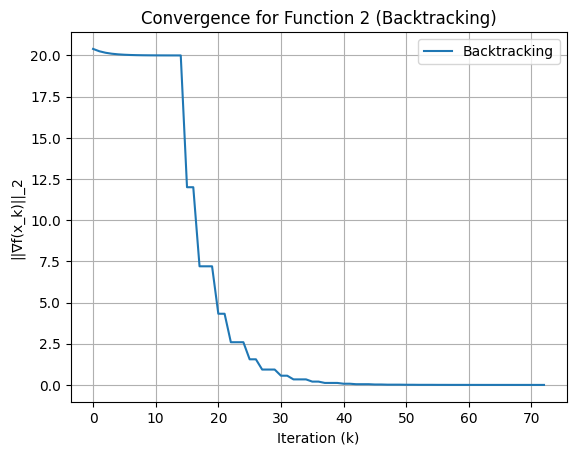

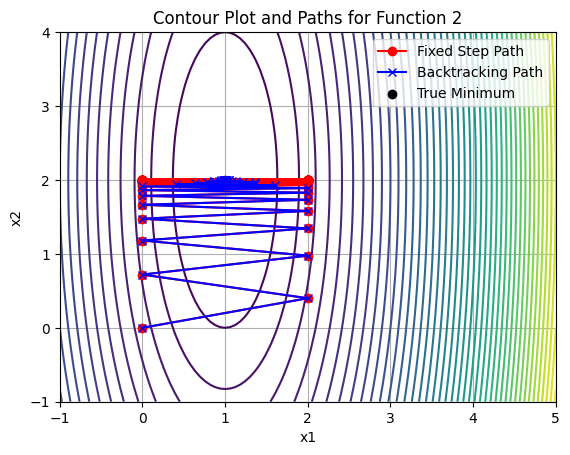

In [31]:
for f, grad_f, label in functions:
    print(f"Experiments for {label}")

    # Fixed step size
    alpha_values = np.linspace(0.1, 1.0, 10)
    for alpha in alpha_values:
        x_star, path = gradient_descent(f, grad_f, x0, alpha=alpha, kmax=kmax, tolx=tolx, tolf=tolf)
        print(f"Fixed step size \u03b1={alpha}: Solution x*={x_star}, Iterations={len(path) - 1}")
        if alpha == selected_path[0]:
            selected_path = (alpha, path)

        # Plot convergence
        norms = [np.linalg.norm(grad_f(x), 2) for x in path]
        plt.plot(norms, label=f"\u03b1={alpha}")

    plt.xlabel("Iteration (k)")
    plt.ylabel(r"$||\nabla f(x_k)||_2$")
    plt.title(f"Convergence for {label} (Fixed Step Size)")
    plt.legend()
    plt.grid()
    plt.show()

    # Backtracking
    x_star_bt, path_bt = gradient_descent(f, grad_f, x0, alpha=0.1, kmax=kmax, tolx=tolx, tolf=tolf, backtracking=True)
    print(f"Backtracking: Solution x*={x_star_bt}, Iterations={len(path_bt) - 1}")

    norms_bt = [np.linalg.norm(grad_f(x), 2) for x in path_bt]
    plt.plot(norms_bt, label="Backtracking")
    plt.xlabel("Iteration (k)")
    plt.ylabel("||\u2207f(x_k)||_2")
    plt.title(f"Convergence for {label} (Backtracking)")
    plt.legend()
    plt.grid()
    plt.show()

    # Contour plot and path visualization
    x_vals = np.linspace(-1, 5, 100)
    y_vals = np.linspace(-1, 4, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f([X, Y])

    plt.contour(X, Y, Z, levels=50, cmap='viridis')
    path = np.array(selected_path[1])
    plt.plot(path[:, 0], path[:, 1], marker='o', color='red', label="Fixed Step Path")
    path_bt = np.array(path_bt)
    plt.plot(path_bt[:, 0], path_bt[:, 1], marker='x', color='blue', label="Backtracking Path")
    if label == "Function 1":
        plt.scatter([3], [1], color='black', label="True Minimum")
    else:
        plt.scatter([1], [2], color='black', label="True Minimum")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f"Contour Plot and Paths for {label}")
    plt.legend()
    plt.grid()
    plt.show()

Running for n=5 with no regularization


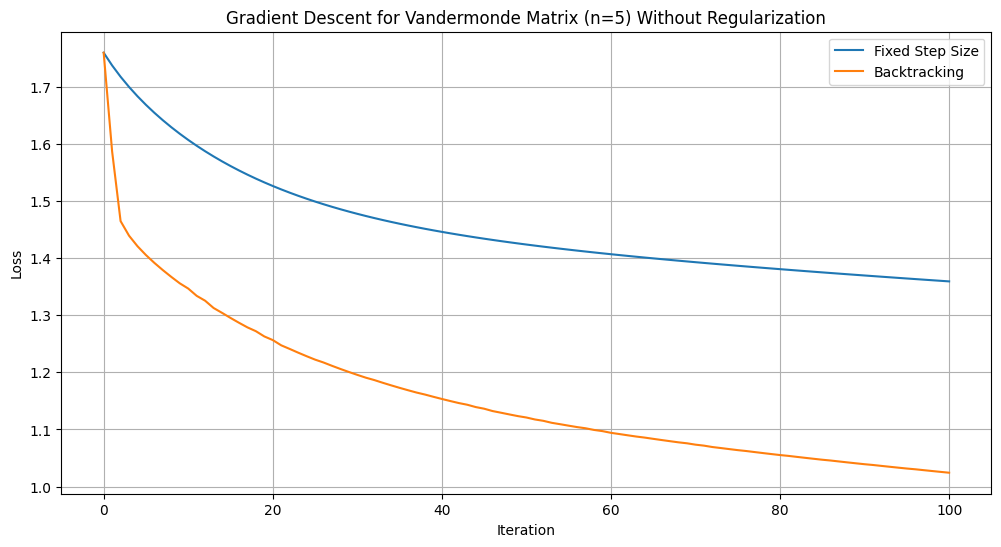

Running for n=5, lambda=1


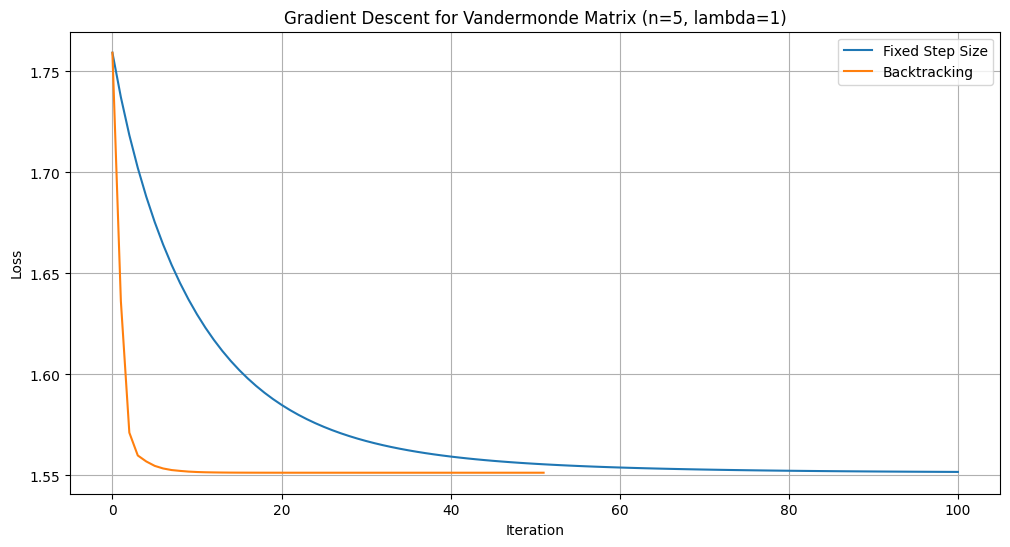

Running for n=5, lambda=5


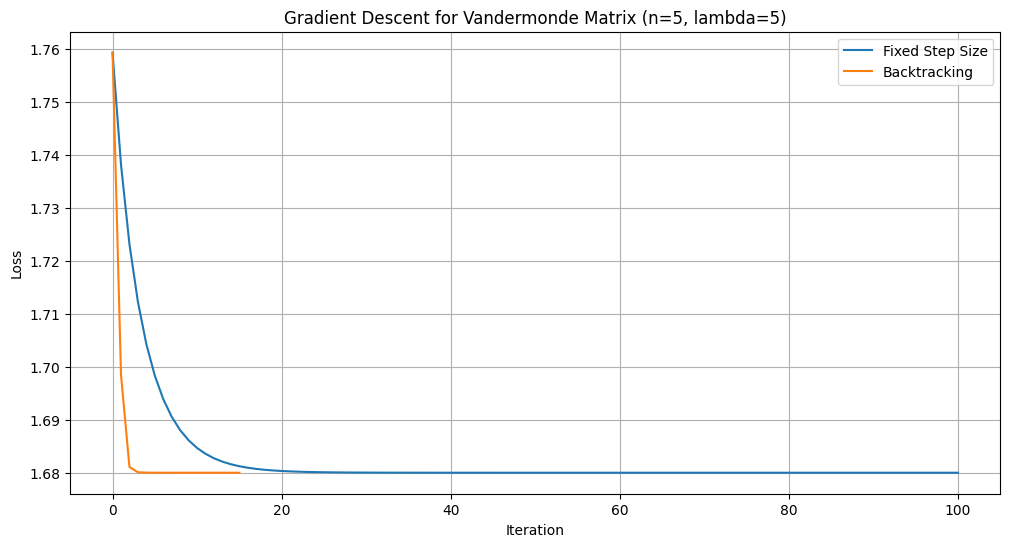

Running for n=5, lambda=10


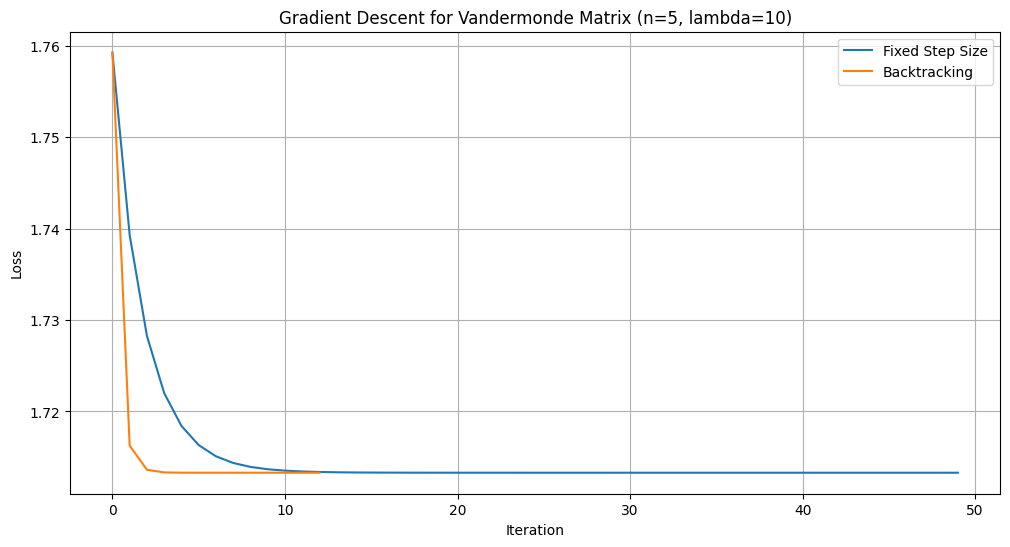

Running for n=10 with no regularization


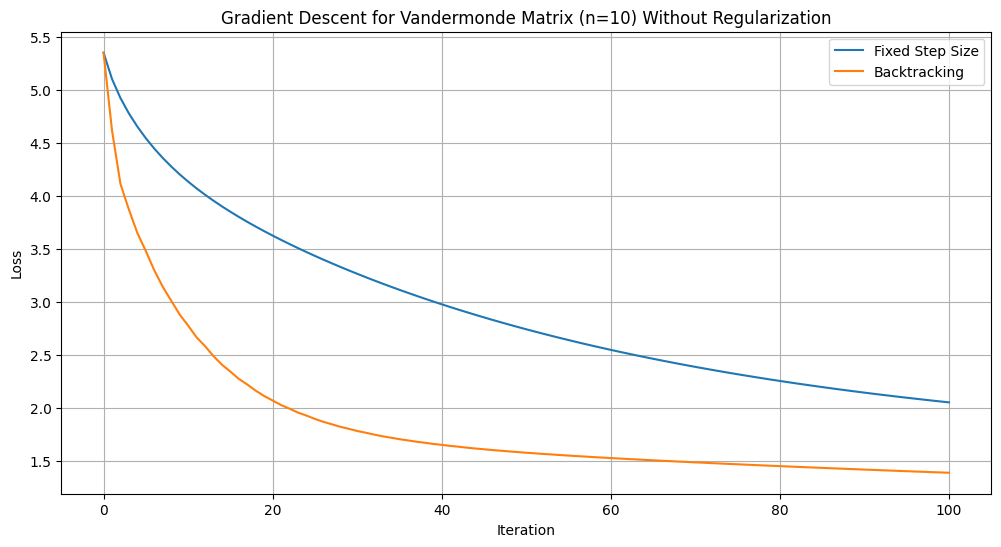

Running for n=10, lambda=1


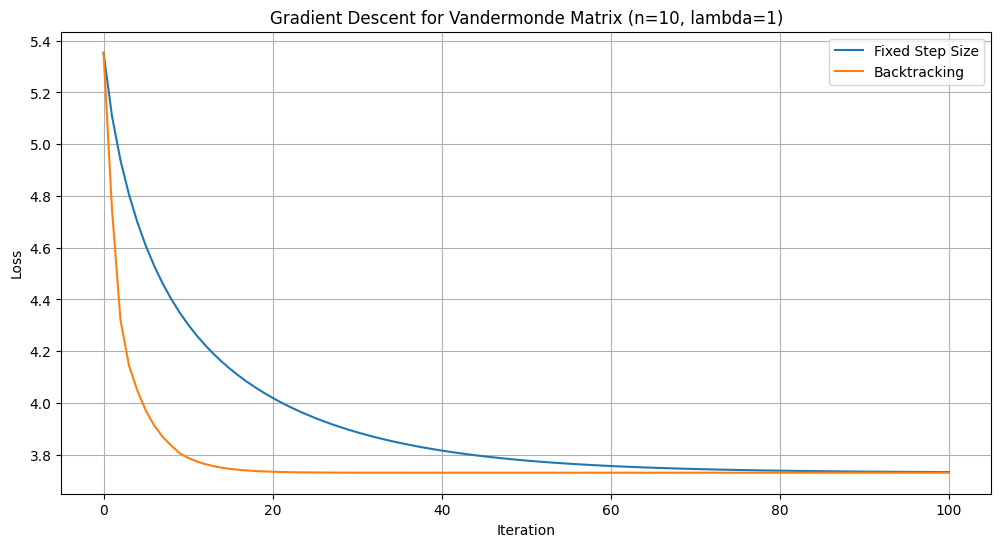

Running for n=10, lambda=5


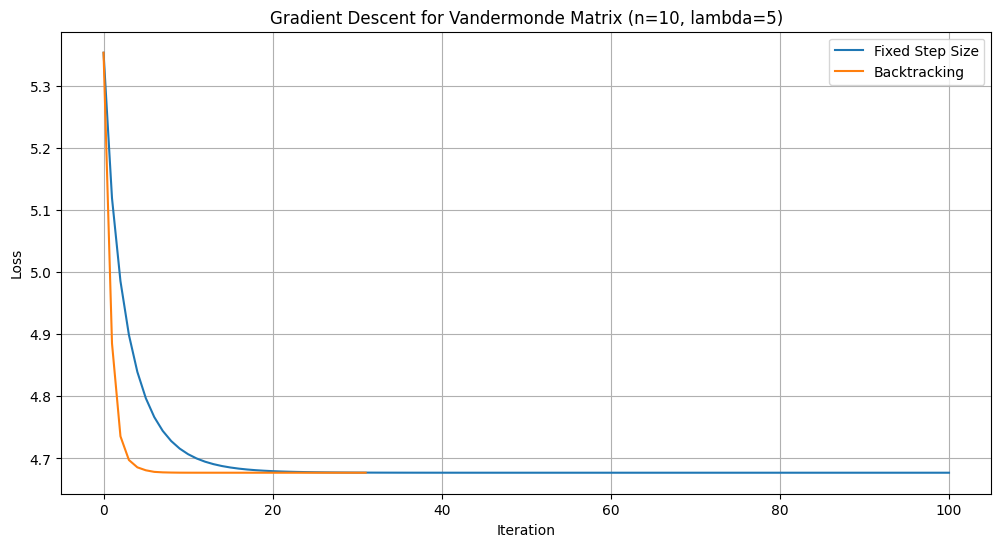

Running for n=10, lambda=10


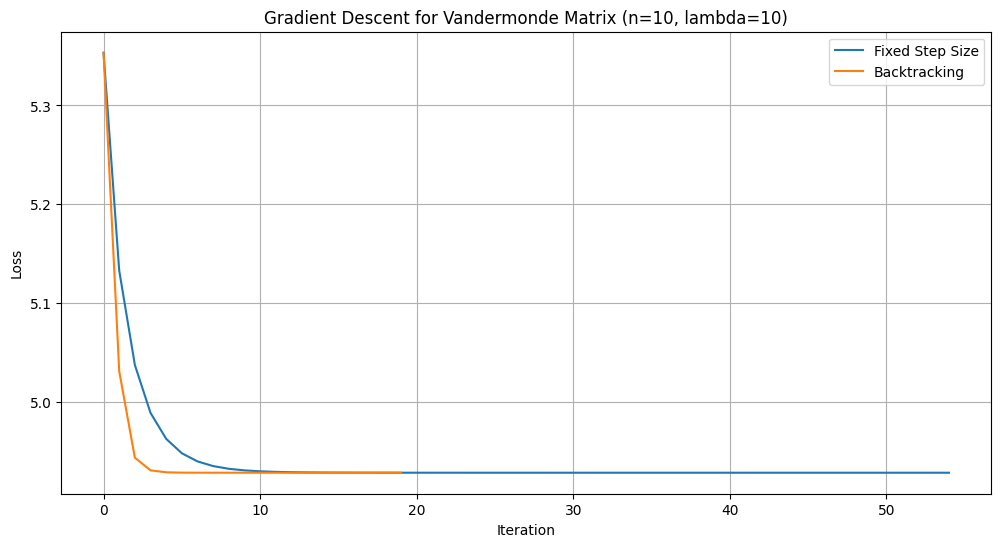

Running for n=15 with no regularization


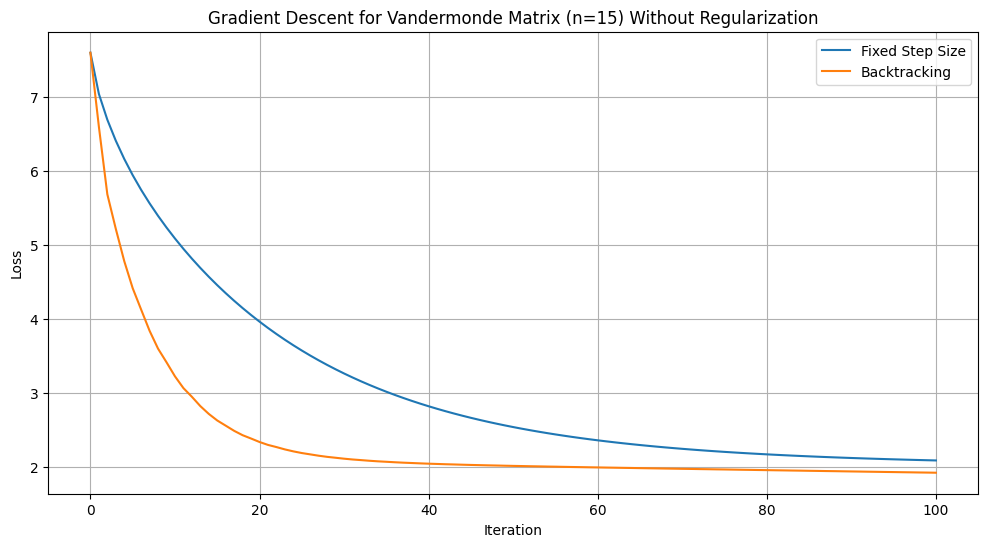

Running for n=15, lambda=1


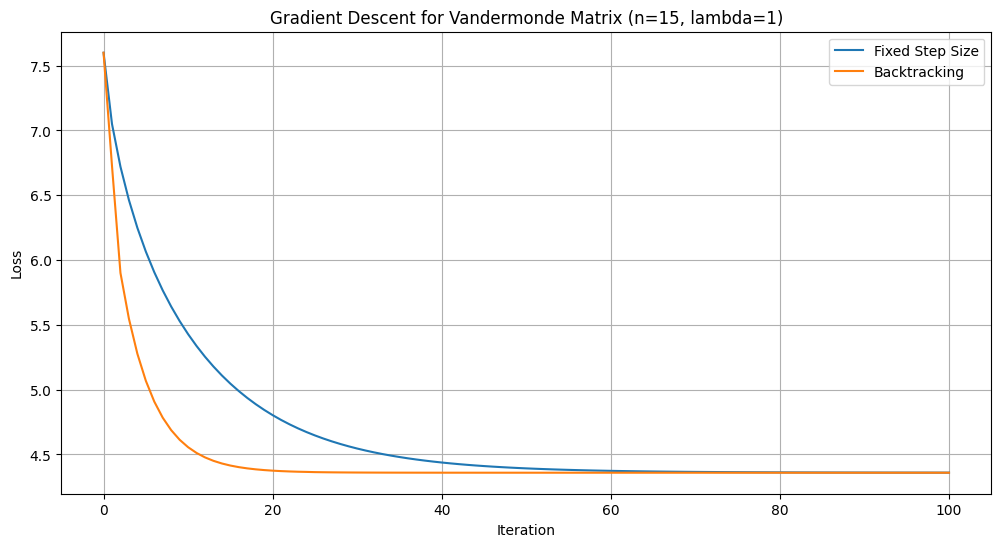

Running for n=15, lambda=5


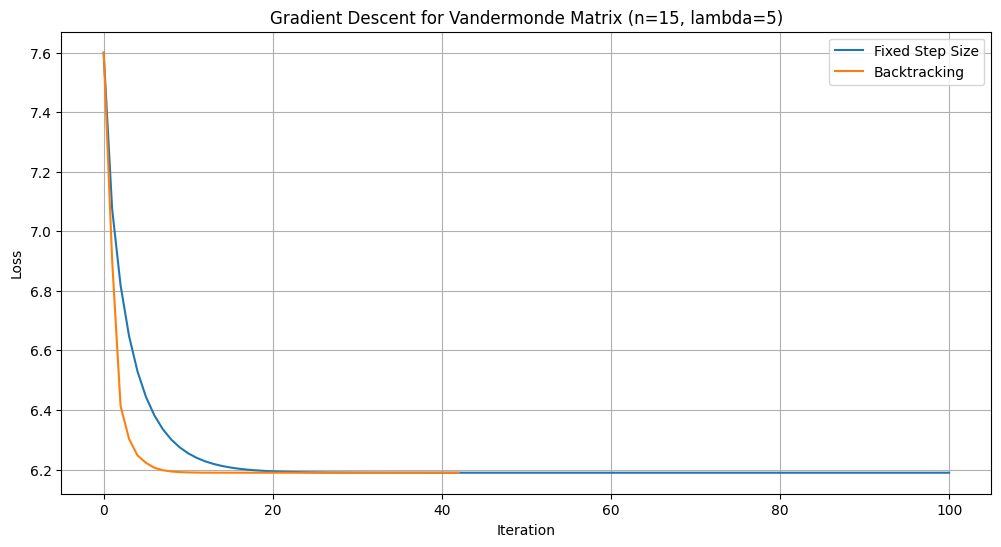

Running for n=15, lambda=10


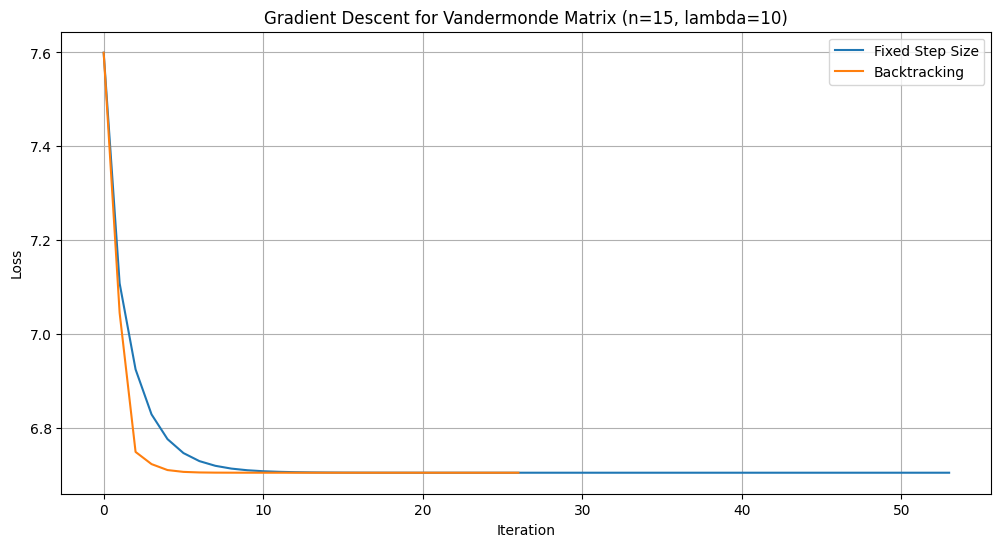

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions


def f3(A, b, x):
    return np.linalg.norm(A @ x - b)**2

def grad_f3(A, b, x):
    return 2 * A.T @ (A @ x - b)

def f4(A, b, x, lamb):
    return np.linalg.norm(A @ x - b)**2 + lamb * np.linalg.norm(x)**2

def grad_f4(A, b, x, lamb):
    return 2 * A.T @ (A @ x - b) + 2 * lamb * x

# Gradient descent with fixed step size
def gradient_descent_fixed(grad, x0, step_size, tol=1e-5, kmax=100):
    x = x0
    history = [x0]
    for _ in range(kmax):
        grad_x = grad(x)
        x = x - step_size * grad_x
        history.append(x)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, history

# Gradient descent with backtracking line search
def gradient_descent_backtracking(f, grad, x0, alpha=0.3, beta=0.8, tol=1e-5, kmax=100):
    x = x0
    history = [x0]
    for _ in range(kmax):
        grad_x = grad(x)
        t = 1
        while f(x - t * grad_x) > f(x) - alpha * t * np.linalg.norm(grad_x)**2:
            t *= beta
        x = x - t * grad_x
        history.append(x)
        if np.linalg.norm(grad_x) < tol:
            break
    return x, history

# Vandermonde matrix generation
def generate_vandermonde(n):
    np.random.seed(0)  # For reproducibility
    x = np.linspace(0, 1, n)
    A = np.vander(x, increasing=True)
    b = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(n)
    return A, b

# Main script for analysis
n_values = [5, 10, 15]
lamb_values = [1, 5, 10]

for n in n_values:
    print(f"Running for n={n} with no regularization")

    A, b = generate_vandermonde(n)
    x0 = np.zeros(A.shape[1])
    f = lambda x: f3(A, b, x)
    grad = lambda x: grad_f3(A, b, x)
    # Fixed step size gradient descent
    step_size = 1e-2
    x_fixed, history_fixed = gradient_descent_fixed(grad, x0, step_size)
    losses_fixed = [f(x) for x in history_fixed]
    # Backtracking gradient descent
    x_back, history_back = gradient_descent_backtracking(f, grad, x0)
    losses_back = [f(x) for x in history_back]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(losses_fixed, label="Fixed Step Size")
    plt.plot(losses_back, label="Backtracking")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title(f"Gradient Descent for Vandermonde Matrix (n={n}) Without Regularization")
    plt.legend()
    plt.grid()
    plt.show()
    for lamb in lamb_values:
        print(f"Running for n={n}, lambda={lamb}")

        # Function and gradient
        f = lambda x: f4(A, b, x, lamb)
        grad = lambda x: grad_f4(A, b, x, lamb)

        # Fixed step size gradient descent
        step_size = 1e-2
        x_fixed, history_fixed = gradient_descent_fixed(grad, x0, step_size)
        losses_fixed = [f(x) for x in history_fixed]

        # Backtracking gradient descent
        x_back, history_back = gradient_descent_backtracking(f, grad, x0)
        losses_back = [f(x) for x in history_back]

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(losses_fixed, label="Fixed Step Size")
        plt.plot(losses_back, label="Backtracking")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.title(f"Gradient Descent for Vandermonde Matrix (n={n}, lambda={lamb})")
        plt.legend()
        plt.grid()
        plt.show()


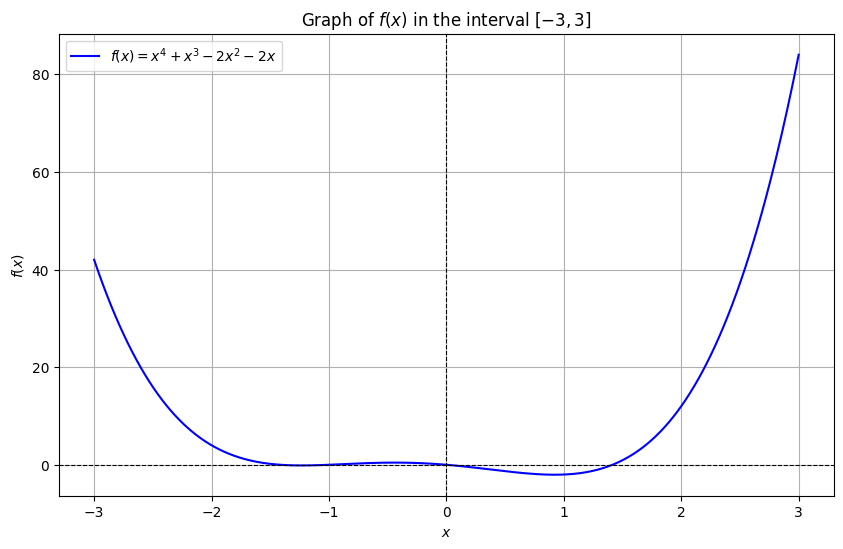

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) and its derivative f'(x)
def f(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def df(x):
    return 4*x**3 + 3*x**2 - 4*x - 2

# Generate x values for plotting
x = np.linspace(-3, 3, 500)
y = f(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r"$f(x) = x^4 + x^3 - 2x^2 - 2x$", color="blue")
plt.title("Graph of $f(x)$ in the interval $[-3, 3]$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend()
plt.grid()
plt.show()


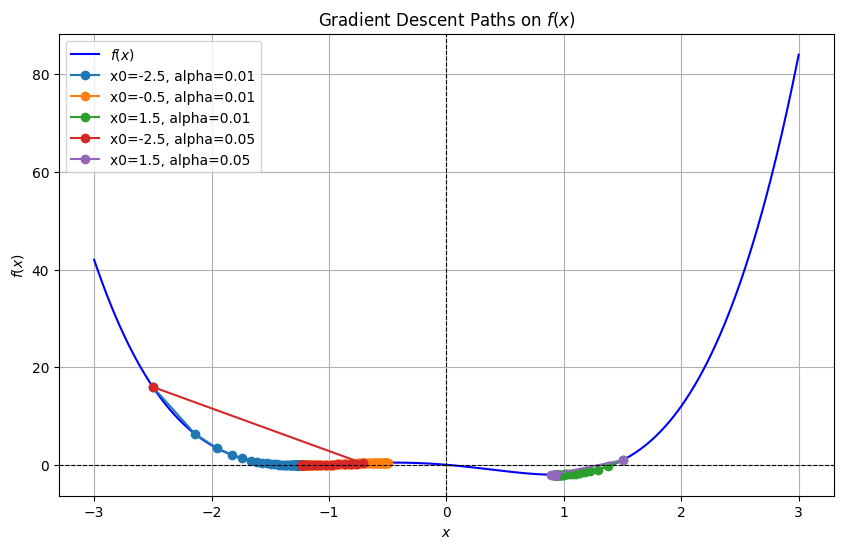

[{'x0': -2.5,
  'alpha': 0.01,
  'x_min': -1.2322539751346648,
  'path': [-2.5,
   -2.1425,
   -1.952519941875,
   -1.8272444272098975,
   -1.736465100101702,
   -1.6669437396765627,
   -1.6117049739911398,
   -1.5666388232581816,
   -1.5291314410790158,
   -1.4974247543138048,
   -1.4702842946094703,
   -1.4468130894783433,
   -1.4263409481399993,
   -1.4083553529590964,
   -1.3924565803325308,
   -1.3783275731304576,
   -1.365713136390855,
   -1.3544052166303733,
   -1.3442322619628622,
   -1.335051386426186,
   -1.3267425027313549,
   -1.319203863148458,
   -1.312348624933683,
   -1.3061021726625996,
   -1.3004000075314546,
   -1.295186066729468,
   -1.2904113728149784,
   -1.2860329390009,
   -1.2820128748328077,
   -1.2783176502061258,
   -1.274917485543755,
   -1.271785843279715,
   -1.2688990012833832,
   -1.2662356930124448,
   -1.2637768023540599,
   -1.2615051035557787,
   -1.2594050385430158,
   -1.2574625254018343,
   -1.2556647929726483,
   -1.2540002374252996,
   -1.25245

In [51]:
# Gradient Descent implementation
def gradient_descent(f_prime, x0, alpha, max_iter=1000, tol=1e-6):
    x = x0
    path = [x]  # To store the path of x values
    for _ in range(max_iter):
        grad = f_prime(x)
        x_next = x - alpha * grad
        path.append(x_next)
        if abs(x_next - x) < tol:  # Convergence criteria
            break
        x = x_next
    return x, path

# Test GD with different initial points and step sizes
test_cases = [
    {"x0": -2.5, "alpha": 0.01},
    {"x0": -0.5, "alpha": 0.01},
    {"x0": 1.5, "alpha": 0.01},
    {"x0": -2.5, "alpha": 0.05},
    {"x0": 1.5, "alpha": 0.05},
]

results = []
for case in test_cases:
    x_min, path = gradient_descent(df, case["x0"], case["alpha"])
    results.append({"x0": case["x0"], "alpha": case["alpha"], "x_min": x_min, "path": path})

# Plot the convergence paths
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r"$f(x)$", color="blue")

for res in results:
    path_x = np.array(res["path"])
    path_y = f(path_x)
    plt.plot(path_x, path_y, marker="o", label=f"x0={res['x0']}, alpha={res['alpha']}")

plt.title("Gradient Descent Paths on $f(x)$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend()
plt.grid()
plt.show()

# Display convergence results
results


## Optimization via Stochastic Gradient Descent
Consider a dataset $(X,Y)$, where:

$$
X = \begin{bmatrix} x^1 & x^2 & \dots & x^N \end{bmatrix} \in \mathbb{R}^{d \times N}, \qquad Y = \begin{bmatrix} y^1 & y^2 & \dots & y^N \end{bmatrix} \in \mathbb{R}^N,
$$

together with a model $f_\theta(x)$, with vector of parameters $\theta$. **Training** a ML model requires solving:

$$
\theta^* = \arg\min_{\theta} \ell(\theta; X, Y) = \arg\min_{\theta} \sum_{i=1}^N \ell_i(\theta; x^i, y^i). 
$$

Since the optimization problem above is written as a sum of independent terms that only depends on the single datapoints, it satisfies the hypothesis for the application of the Stochastic Gradient Descent (SGD) algorithm, which articulates as follows:

* Given an integer `batch_size`, *randomly* extract a sub-dataset $\mathcal{M}$ such that $|\mathcal{M}| = `batch_size`$ from the original dataset. Note that the random sampling at each iteration has to be done without replacement.
* Compute the gradient of the loss function on the sampled batch $\mathcal{M}$ as:

  $$
  \nabla \ell(\theta; \mathcal{M}) = \frac{1}{| \mathcal{M} |} \sum_{i \in \mathcal{M}} \nabla \ell (\theta; x^i, y^i),
  $$
* Compute one single iteration of the GD algorithm on the direction described by $\nabla \ell(\theta; \mathcal{M})$:

  $$
  \theta_{k+1} = \theta_k - \alpha_k \nabla \ell(\theta_k; \mathcal{M}),
  $$

* Repeat until the full dataset has been extracted. When this happens, we say that we completed an **epoch** of the SGD method. Repeat this procedure for a number of epochs equal to a parameter `n_epochs`, given as input.

Consider the dataset `poly_regression_large.csv`, provided on Virtuale, and let $f_\theta(x)$ be a polynomial regression model, as discussed in https://devangelista2.github.io/statistical-mathematical-methods/regression_classification/regression.html.

* Split the dataset into training and test set as in the Homework 2, with a proportion of 80% training and 20% test. 
* Fix a degree $K$ for the polynomial. 
* Train the polynomial regression model on the training set via the Stochastic Gradient Descent algorithm.
* Train the polynomial regression model on the training set via the Gradient Descent algorithm.
* Train the polynomial regression model on the `poly_regression_small.csv` dataset. Use the full dataset for this test, without splitting it into training and test set.
* Compare the performance of the three regression model computed above. In particular, if $(X_{test}, Y_{test})$ is the test set from the `poly_regression_large.csv` dataset, for each of the model, compute:

  $$
  Err = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} (f_\theta(x^i) - y^i)^2,
  $$

  where $N_{test}$ is the number of elements in the test set, $(x^i, y^i)$ are the input and output elements in the test set. Comment the performance of the three models.

* Repeat the experiment by varying the degree $K$ of the polynomial. Comment the results.
* Set $K=5$ (so that the polynomial regression model is a polynomial of degree 4). Compare the parameters learned by the three models with the true parameter $\theta^* = [0, 0, 4, 0, -3]$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
data = pd.read_csv("poly_regression_large.csv")
X = data['x'].values.reshape(-1, 1)
Y = data['y'].values

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Function to create polynomial features
def polynomial_features(x, degree):
    return np.hstack([x**i for i in range(degree + 1)])

# Function to compute the loss (MSE)
def compute_loss(y_true, y_pred):
    return np.mean(0.5 * (y_true - y_pred) ** 2)

# Function to compute gradient
def compute_gradient(X, Y, theta):
    predictions = X @ theta
    errors = predictions - Y
    return X.T @ errors / len(Y)

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, Y, degree, alpha, batch_size, n_epochs):
    X_poly = polynomial_features(X, degree)
    theta = np.random.randn(X_poly.shape[1])  # Initialize parameters
    losses = []

    for epoch in range(n_epochs):
        indices = np.arange(len(X_poly))
        np.random.shuffle(indices)
        X_poly_shuffled = X_poly[indices]
        Y_shuffled = Y[indices]

        for start in range(0, len(X_poly), batch_size):
            end = start + batch_size
            X_batch = X_poly_shuffled[start:end]
            Y_batch = Y_shuffled[start:end]
            gradient = compute_gradient(X_batch, Y_batch, theta)
            theta -= alpha * gradient

        # Compute loss for the epoch
        losses.append(compute_loss(Y, X_poly @ theta))

    return theta, losses

# Gradient Descent (GD)
def gradient_descent(X, Y, degree, alpha, n_epochs):
    X_poly = polynomial_features(X, degree)
    theta = np.random.randn(X_poly.shape[1])  # Initialize parameters
    losses = []

    for epoch in range(n_epochs):
        gradient = compute_gradient(X_poly, Y, theta)
        theta -= alpha * gradient
        losses.append(compute_loss(Y, X_poly @ theta))

    return theta, losses

In [61]:
# Parameters
degree = 4
alpha = 0.1
batch_size = 32
n_epochs = 100

In [62]:
# Evaluate on the test set
def evaluate(X, Y, theta, degree):
    X_poly = polynomial_features(X, degree)
    predictions = X_poly @ theta
    total_variance = np.sum((Y - np.mean(Y))**2)
    residual_variance = np.sum((Y - predictions)**2)
    accuracy = 1 - residual_variance / total_variance if total_variance > 0 else 0
    return compute_loss(Y, predictions), accuracy


In [63]:
# Train using SGD
theta_sgd, losses_sgd = stochastic_gradient_descent(X_train, Y_train, degree, alpha, batch_size, n_epochs)
# Train using GD
theta_gd, losses_gd = gradient_descent(X_train, Y_train, degree, alpha, n_epochs)
test_loss_sgd, accuracy_sgd = evaluate(X_test, Y_test, theta_sgd, degree)
test_loss_gd, accuracy_gd = evaluate(X_test, Y_test, theta_gd, degree)

In [64]:
# Train on poly_regression_small.csv without splitting
small_data = pd.read_csv("poly_regression_small.csv")
X_small = small_data['x'].values.reshape(-1, 1)
Y_small = small_data['y'].values
# Train using SGD on the full dataset
theta_sgd_small, losses_sgd_small = stochastic_gradient_descent(X_small, Y_small, degree, alpha, batch_size, n_epochs)

# Train using GD on the full dataset
theta_gd_small, losses_gd_small = gradient_descent(X_small, Y_small, degree, alpha, n_epochs)

# Evaluate the small dataset model
small_loss_sgd, small_accuracy_sgd = evaluate(X_test, Y_test, theta_sgd_small, degree)
small_loss_gd, small_accuracy_gd = evaluate(X_test, Y_test, theta_gd_small, degree)


In [65]:
import pandas as pd
results_df = pd.DataFrame({
    "Model": ["SGD on large dataset", "GD on large dataset", "SGD on small dataset", "GD on small dataset"],
    "Test Loss": [test_loss_sgd, test_loss_gd, small_loss_sgd, small_loss_gd],
    "Accuracy": [accuracy_sgd, accuracy_gd, small_accuracy_sgd, small_accuracy_gd]
})

# Display the DataFrame
print(results_df)

                  Model  Test Loss  Accuracy
0  SGD on large dataset   0.005130  0.956555
1   GD on large dataset   0.019887  0.831572
2  SGD on small dataset   0.026140  0.778612
3   GD on small dataset   0.064013  0.457850


In [66]:
# Compare learned parameters with true parameters
true_theta = np.array([0, 0, 4, 0, -3])
print(f"True Parameters: {true_theta}")
print(f"Learned Parameters (SGD on large dataset): {theta_sgd}")
print(f"Learned Parameters (GD on large dataset): {theta_gd}")
print(f"Learned Parameters (SGD on small dataset): {theta_sgd_small}")
print(f"Learned Parameters (GD on small dataset): {theta_gd_small}")


True Parameters: [ 0  0  4  0 -3]
Learned Parameters (SGD on large dataset): [-0.13024433  1.23755463  1.33085357  1.43537755 -2.80525956]
Learned Parameters (GD on large dataset): [ 0.10868003  1.41637103 -0.66344218  1.11014771 -0.60224442]
Learned Parameters (SGD on small dataset): [ 0.2732758  -0.01559378  0.68207257  2.51051199 -1.93596284]
Learned Parameters (GD on small dataset): [ 0.38725541 -0.37950673  0.80969754  0.25260508  0.88061826]


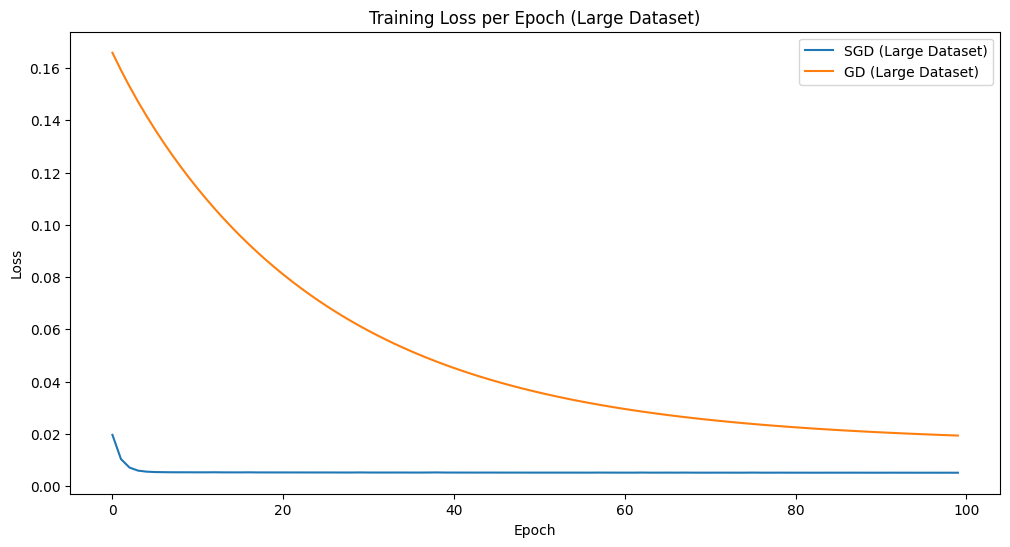

In [67]:
# Plot the training loss for large dataset
plt.figure(figsize=(12, 6))
plt.plot(range(n_epochs), losses_sgd, label="SGD (Large Dataset)")
plt.plot(range(n_epochs), losses_gd, label="GD (Large Dataset)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch (Large Dataset)")
plt.legend()
plt.show()

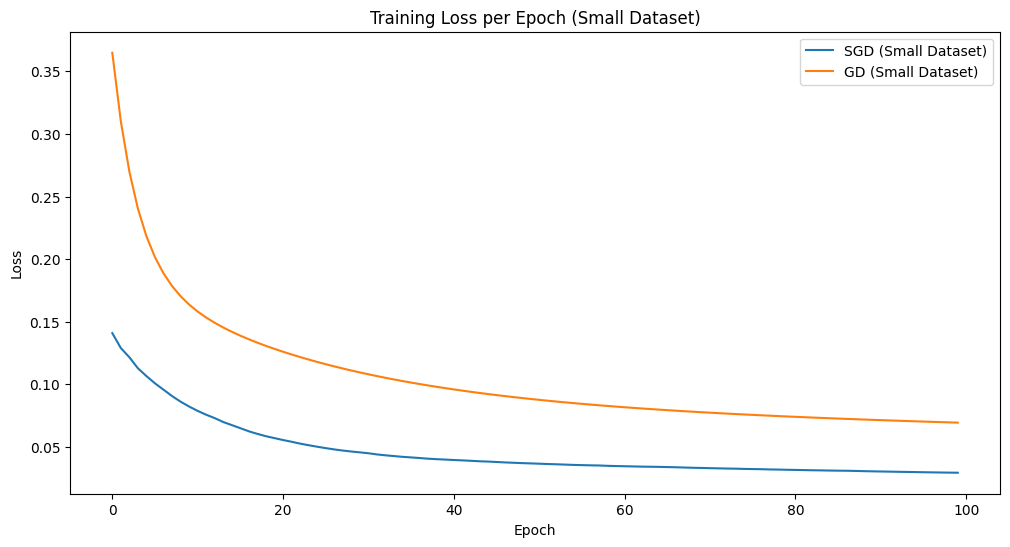

In [68]:
# Plot the training loss for small dataset
plt.figure(figsize=(12, 6))
plt.plot(range(n_epochs), losses_sgd_small, label="SGD (Small Dataset)")
plt.plot(range(n_epochs), losses_gd_small, label="GD (Small Dataset)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch (Small Dataset)")
plt.legend()
plt.show()


### Comment
Is noticed that while the accuracies are quite good, the parameters are not quite good, this might get better with regularization. Let's try it

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
X_small_scaled = scaler.transform(X_small)

In [76]:
def compute_loss_with_reg(y_true, y_pred, theta, lambda_):
    mse_loss = compute_loss(y_true, y_pred)
    reg_loss = lambda_ * np.sum(theta**2)
    return mse_loss + reg_loss

In [77]:
degree = 4
lambda_ = 0.01

In [78]:
def gradient_descent_with_reg(X, Y, degree, alpha, n_epochs, lambda_):
    X_poly = polynomial_features(X, degree)
    theta = np.random.randn(X_poly.shape[1])  # Initialize parameters
    losses = []

    for epoch in range(n_epochs):
        gradient = compute_gradient(X_poly, Y, theta) + lambda_ * theta
        theta -= alpha * gradient
        loss = compute_loss(Y, X_poly @ theta) + lambda_ * np.sum(theta**2)
        losses.append(loss)

    return theta, losses

def stochastic_gradient_descent_with_reg(X, Y, degree, alpha, batch_size, n_epochs, lambda_):
    X_poly = polynomial_features(X, degree)
    theta = np.random.randn(X_poly.shape[1])  # Initialize parameters
    losses = []

    for epoch in range(n_epochs):
        indices = np.arange(len(X_poly))
        np.random.shuffle(indices)
        X_poly_shuffled = X_poly[indices]
        Y_shuffled = Y[indices]

        for start in range(0, len(X_poly), batch_size):
            end = start + batch_size
            X_batch = X_poly_shuffled[start:end]
            Y_batch = Y_shuffled[start:end]
            
            # Compute gradient with regularization
            gradient = compute_gradient(X_batch, Y_batch, theta) + 2 * lambda_ * theta
            theta -= alpha * gradient

        # Compute regularized loss for the epoch
        loss = compute_loss(Y, X_poly @ theta) + lambda_ * np.sum(theta**2)
        losses.append(loss)

    return theta, losses
def stochastic_gradient_descent_with_l1(X, Y, degree, alpha, batch_size, n_epochs, lambda_):
    X_poly = polynomial_features(X, degree)
    theta = np.random.randn(X_poly.shape[1])  # Initialize parameters
    losses = []

    for epoch in range(n_epochs):
        indices = np.arange(len(X_poly))
        np.random.shuffle(indices)
        X_poly_shuffled = X_poly[indices]
        Y_shuffled = Y[indices]

        for start in range(0, len(X_poly), batch_size):
            end = start + batch_size
            X_batch = X_poly_shuffled[start:end]
            Y_batch = Y_shuffled[start:end]
            
            # Compute gradient with L1 regularization
            gradient = compute_gradient(X_batch, Y_batch, theta) + lambda_ * np.sign(theta)
            theta -= alpha * gradient

        # Compute L1-regularized loss for the epoch
        loss = compute_loss(Y, X_poly @ theta) + lambda_ * np.sum(np.abs(theta))
        losses.append(loss)

    return theta, losses


In [79]:
# Train with L2 Regularization
lambda_ = 0.1  # Regularization strength

theta_sgd_l2, losses_sgd_l2 = stochastic_gradient_descent_with_reg(X_train, Y_train, degree, alpha, batch_size, n_epochs, lambda_)

# Train with L1 Regularization
theta_sgd_l1, losses_sgd_l1 = stochastic_gradient_descent_with_l1(X_train, Y_train, degree, alpha, batch_size, n_epochs, lambda_)
# Train with L2 Regularization small dataset
theta_sgd_l2_small, losses_sgd_l2_small = stochastic_gradient_descent_with_reg(X_small_scaled, Y_small, degree, alpha, batch_size, n_epochs, lambda_)

# Train with L1 Regularization small dataset
theta_sgd_l1_small, losses_sgd_l1_small = stochastic_gradient_descent_with_l1(X_small_scaled, Y_small, degree, alpha, batch_size, n_epochs, lambda_)

# Evaluate L2-regularized model
test_loss_sgd_l2, accuracy_sgd_l2 = evaluate(X_test, Y_test, theta_sgd_l2, degree)

# Evaluate L1-regularized model
test_loss_sgd_l1, accuracy_sgd_l1 = evaluate(X_test, Y_test, theta_sgd_l1, degree)

# Evaluate L2-regularized model small dataset
test_loss_sgd_l2_small, accuracy_sgd_l2_small = evaluate(X_test, Y_test, theta_sgd_l2, degree)
# Evaluate L1-regularized model small dataset
test_loss_sgd_l1_small, accuracy_sgd_l1_small = evaluate(X_test, Y_test, theta_sgd_l1, degree)


# True parameters
true_theta = np.array([0, 0, 4, 0, -3])

# Compile results into a DataFrame
results_df = pd.DataFrame({
    "Model": [
        "SGD on large dataset",
        "GD on large dataset",
        "SGD on small dataset",
        "GD on small dataset",
        "SGD with L2 regularization",
        "SGD with L1 regularization",
        "SGD with L2 regularization (small dataset)",
        "SGD with L1 regularization (small dataset)"
    ],
    "Test Loss": [
        test_loss_sgd, 
        test_loss_gd, 
        small_loss_sgd, 
        small_loss_gd, 
        test_loss_sgd_l2, 
        test_loss_sgd_l1,
        test_loss_sgd_l2_small,
        test_loss_sgd_l1_small
    ],
    "Accuracy": [
        accuracy_sgd, 
        accuracy_gd, 
        small_accuracy_sgd, 
        small_accuracy_gd, 
        accuracy_sgd_l2, 
        accuracy_sgd_l1,
        accuracy_sgd_l2_small,
        accuracy_sgd_l1_small
    ]
})

# Display the results
print(results_df)

# Compare coefficients
coefficients_df = pd.DataFrame({
    "True Coefficients": true_theta,
    "SGD (Large Dataset)": theta_sgd[:len(true_theta)],
    "GD (Large Dataset)": theta_gd[:len(true_theta)],
    "SGD (Small Dataset)": theta_sgd_small[:len(true_theta)],
    "GD (Small Dataset)": theta_gd_small[:len(true_theta)],
    "SGD with L2": theta_sgd_l2[:len(true_theta)],
    "SGD with L1": theta_sgd_l1[:len(true_theta)],
    "SGD with L2 (Small Dataset)": theta_sgd_l2_small[:len(true_theta)],
    "SGD with L1 (Small Dataset)": theta_sgd_l1_small[:len(true_theta)]
})

# Display coefficients
print("\nComparison of Coefficients:")
print(coefficients_df)


                                        Model  Test Loss  Accuracy
0                        SGD on large dataset   0.005130  0.956555
1                         GD on large dataset   0.019887  0.831572
2                        SGD on small dataset   0.026140  0.778612
3                         GD on small dataset   0.064013  0.457850
4                  SGD with L2 regularization   0.030887  0.738407
5                  SGD with L1 regularization   0.032254  0.726826
6  SGD with L2 regularization (small dataset)   0.030887  0.738407
7  SGD with L1 regularization (small dataset)   0.032254  0.726826

Comparison of Coefficients:
   True Coefficients  SGD (Large Dataset)  GD (Large Dataset)  \
0                  0            -0.130244            0.108680   
1                  0             1.237555            1.416371   
2                  4             1.330854           -0.663442   
3                  0             1.435378            1.110148   
4                 -3            -2.805260  

### Conclusion
It made it worse in the coefficients and in the accuracy